In [1]:
from qiskit import *
import numpy as np
import qiskit.quantum_info as qi
from sympy import *
import funzioni01 as f1
import funzioni02 as f2

from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile

In [2]:
qc=f1.final_state_vector(N_steps=2, time=np.pi/6, initial_state= "110")

backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=32000)
result = job.result()
A=result.get_unitary(qc, decimals=7)
Matrix(A)

Matrix([
[                     0,                 0,                    0,                      0,                      0,                    0, 0.5 - 0.8660254*I,                      0],
[                     0,                 0,                -0.25,                      0,   0.1875 - 0.7577722*I,                    0,                 0,   0.5625 - 0.1082532*I],
[                     0,                 0, 0.1875 - 0.7577722*I,                      0, -0.09375 + 0.2706329*I,                    0,                 0,  0.40625 - 0.3788861*I],
[-0.46875 - 0.3788861*I,                 0,                    0,  0.40625 - 0.3788861*I,                      0, 0.5625 - 0.1082532*I,                 0,                      0],
[                     0,                 0, 0.5625 - 0.1082532*I,                      0,  0.40625 - 0.3788861*I,                    0,                 0, -0.46875 - 0.3788861*I],
[ 0.40625 - 0.3788861*I,                 0,                    0, -0.09375 + 0.2706329*I,  

In [3]:
Matrix(qi.Statevector.from_instruction(qc))

Matrix([
[-2.87991800354102e-17 - 3.16503603332562e-17*I],
[-5.25881257933142e-18 + 8.76131535090731e-17*I],
[ 9.04831671734609e-17 + 2.42448915727391e-17*I],
[                -0.46875 - 0.378886114155692*I],
[-4.24901465303141e-17 + 4.95702741828028e-17*I],
[                 0.40625 - 0.378886114155692*I],
[                  0.5625 - 0.108253175473055*I],
[-2.82465616260767e-16 + 1.82170611497687e-17*I]])

global phase: 7π/12
     ┌──────────────┐┌────┐┌─────────────┐┌────┐┌─────────────┐┌───┐»
q_0: ┤ Rz(-0.90522) ├┤ √X ├┤ Rz(-2.3207) ├┤ √X ├┤ Rz(-1.9604) ├┤ X ├»
     ├─────────────┬┘├────┤├─────────────┤├────┤└┬────────────┤└─┬─┘»
q_1: ┤ Rz(-2.2488) ├─┤ √X ├┤ Rz(-1.6388) ├┤ √X ├─┤ Rz(2.5248) ├──■──»
     └─────────────┘ └────┘└─────────────┘└────┘ └────────────┘     »
«     ┌─────────────┐               ┌───┐┌───────────────┐┌───┐┌─────────────┐»
«q_0: ┤ Rz(0.93649) ├───────────────┤ X ├┤ Rz(0.0086059) ├┤ X ├┤ Rz(-2.2893) ├»
«     └────┬────┬───┘┌─────────────┐└─┬─┘└─────┬────┬────┘└─┬─┘└┬────────────┤»
«q_1: ─────┤ √X ├────┤ Rz(-2.9223) ├──■────────┤ √X ├───────■───┤ Rz(1.8181) ├»
«          └────┘    └─────────────┘           └────┘           └────────────┘»
«     ┌────┐┌──────────────┐┌────┐┌─────────────┐
«q_0: ┤ √X ├┤ Rz(-0.31334) ├┤ √X ├┤ Rz(-1.3456) ├
«     ├────┤├──────────────┤├────┤├─────────────┤
«q_1: ┤ √X ├┤ Rz(-0.95314) ├┤ √X ├┤ Rz(-2.5778) ├
«     └────┘└──────────────┘└─

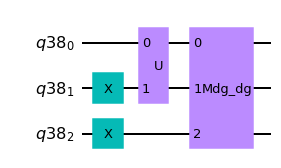

In [4]:
U = f2.Trotter_N_approx(steps=2, tempo=np.pi/6, precision=20)

U2=[
    [U[3*8+3],U[3*8+5],U[3*8+6],0],
    [U[5*8+3],U[5*8+5],U[5*8+6],0],
    [U[6*8+3],U[6*8+5],U[6*8+6],0],
    [0,0,0,1]
]

qc=QuantumCircuit(2, name="U")
qc.unitary(U2,[0,1])    
trans_qc=transpile(qc,basis_gates=['cx','x','sx','rz']) 
print(trans_qc)

qr__ = QuantumRegister(3)
qc__ = QuantumCircuit(qr__)

qc__.x([qr__[1],qr__[2]])

qc__.append(trans_qc, [qr__[0],qr__[1]])
qc__.append(f2.Mdg_circquit().inverse(),[qr__[0],qr__[1],qr__[2]])

qc__.draw(output="mpl")

In [5]:
qc=qc__

backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend , shots=32000)
result = job.result()
A=result.get_unitary(qc, decimals=7)*np.exp(1j*4*np.pi/12)
Matrix(A)

Matrix([
[                                         0,                         0,                                        0,                                         0,                                          0, 0.5 + 0.866025403784439*I,                                        0,                                         0],
[                                         0,                         0,                                        0,                                         0,    0.562500019602248 - 0.108253186790418*I,                         0, -0.468750042481915 - 0.378886089628747*I,   0.406250019602248 - 0.378886125473055*I],
[                                         0,                         0,                                        0,                                         0,    0.187500019602247 - 0.757772239628747*I,                         0,  0.406250019602248 - 0.378886125473055*I, -0.0937500424819151 + 0.270632963209582*I],
[-0.250000042481915 + 2.45269451970564e-8*I,     

In [6]:
Matrix(qi.Statevector.from_instruction(qc))

Matrix([
[ -3.40613461871358e-31 - 8.4371705509238e-31*I],
[-7.31237202152275e-18 - 4.39113262446252e-19*I],
[-1.00286674552986e-17 - 1.05152170963023e-17*I],
[      -0.124999999999999 + 0.216506350946117*I],
[-2.91692921672397e-18 - 5.89433379383376e-19*I],
[      -0.562499999999999 - 0.541265877365272*I],
[       0.187499999999999 - 0.541265877365274*I],
[-1.22029168623901e-15 - 4.16768451492382e-15*I]])

In [7]:
initial_state="110"
U = f2.Trotter_N_approx(steps=2, tempo=np.pi/6, precision=20)

gate_1, gate_2 = f2.simplyfied_gates_matricies(U, precision=20)

### building gate_1 cirquit

qc_aus=QuantumCircuit(2, name="gate_1")
qc_aus.unitary(gate_1, [0,1])

gate_1=transpile(qc_aus,basis_gates=["cx","rz","x","sx"])
print(gate_1)


global phase: π
     ┌─────────────┐┌────┐┌─────────┐          ┌────┐    ┌──────────────┐┌────┐»
q_0: ┤ Rz(-2.3955) ├┤ √X ├┤ Rz(π/2) ├──■───────┤ √X ├────┤ Rz(-0.96085) ├┤ √X ├»
     └┬────────────┤├────┤└┬────────┤┌─┴─┐┌────┴────┴───┐└──────────────┘└────┘»
q_1: ─┤ Rz(1.8457) ├┤ √X ├─┤ Rz(-π) ├┤ X ├┤ Rz(0.96085) ├──────────────────────»
      └────────────┘└────┘ └────────┘└───┘└─────────────┘                      »
«          ┌─────────┐┌────┐┌─────────────┐
«q_0: ──■──┤ Rz(π/2) ├┤ √X ├┤ Rz(-2.6503) ├
«     ┌─┴─┐└┬────────┤├────┤└┬────────────┤
«q_1: ┤ X ├─┤ Rz(-π) ├┤ √X ├─┤ Rz(-3.083) ├
«     └───┘ └────────┘└────┘ └────────────┘


In [8]:

### building gate_2 cirquit

qc_aus=QuantumCircuit(2, name="gate_2")
qc_aus.unitary(gate_2, [0,1])

gate_2=transpile(qc_aus,basis_gates=["cx","rz","x","sx"])
print(gate_2)

### building the evolution cirquit

qr=QuantumRegister(3, name="q")
qc=QuantumCircuit(qr, name="U")

### preparing the initial state

l=0
for k in [2,1,0]:
    if initial_state[l]=='1':
        qc.x(qr[k])
    l+=1

### appending the evolution

qc.append(gate_1, [qr[0],qr[1]])
qc.append(gate_2, [qr[1],qr[2]])

backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=32000)
result = job.result()
A=result.get_unitary(qc, decimals=7)*np.exp(1j*np.pi)
Matrix(A)

     ┌─────────────┐┌────┐┌──────────┐          ┌────┐    ┌──────────────┐»
q_0: ┤ Rz(-1.3889) ├┤ √X ├┤ Rz(-π/2) ├──■───────┤ √X ├────┤ Rz(-0.30994) ├»
     ├─────────────┤├────┤└──────────┘┌─┴─┐┌────┴────┴───┐└──────────────┘»
q_1: ┤ Rz(-1.6314) ├┤ √X ├────────────┤ X ├┤ Rz(0.30994) ├────────────────»
     └─────────────┘└────┘            └───┘└─────────────┘                »
«     ┌────┐     ┌──────────┐    ┌────┐    ┌────────────┐
«q_0: ┤ √X ├──■──┤ Rz(-π/2) ├────┤ √X ├────┤ Rz(1.3889) ├
«     └────┘┌─┴─┐└──┬────┬──┘┌───┴────┴───┐└────────────┘
«q_1: ──────┤ X ├───┤ √X ├───┤ Rz(1.6314) ├──────────────
«           └───┘   └────┘   └────────────┘              


Matrix([
[                    0,                             0,                                   0,                        0,                        0,                                   0, -1.0 + 1.22464679914735e-16*I,                     0],
[                    0,                             0,                                   0,                        0,  0.5906422 + 0.5683457*I,                                   0,                             0, -0.1875 - 0.5412659*I],
[                    0,                             0,             0.0732579 + 0.2960685*I,                        0, -0.1785662 + 0.5154763*I,                                   0,                             0, -0.5625 + 0.5412659*I],
[  0.125 - 0.2165064*I,                             0,                                   0, -0.1465159 + 0.0951649*I,                        0, -0.9523533 + 1.16629642050242e-16*I,                             0,                     0],
[                    0,                        